# Solutions of Optimization Homework.

[Juan Sebastián Corredor Rodriguez](https://github.com/juanse1608) - jucorredor@unal.edu.co

This notebook contents the solution of the homework about optimization found in

In [74]:
#Loading the required libraries
import numpy as np
import pandas as pd
import scipy as sc
import time
import matplotlib
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## Problem 1: The Styblinski-Tang Function.

Minimize the next function using BFGS, Conjugate Gradient and L-BFGS and compare the results:
\begin{align*}
f(x_1,\ldots,x_n) &= \frac{1}{2}\sum_{i=1}^{n} (x_i^4-16x_i^2+5x_i) \:\:\:\:\text{Styblinski-Tang Function}
\end{align*}
Evaluate the behavior of the algorithms as:

1. The dimension $n$ goes to infinity i.e. $n \to \infty$.
2. Changes the initial value $x_0$.

__Solution.__ Let's write the Styblinski-Tang Function in Python:

In [44]:
#The function written in python
def sty_tang(x):
    return 1/2*sum(x**4-16*x**2+5*x)

In [62]:
#We define a dimension and an initial value
dimension = 10
initial_value = 100
initial_x = np.repeat(initial_value , dimension)

Let's see the bahavior of this algorithms in terms of time:

In [27]:
%%timeit -n10 -r1
#It counts the avg time after doing 10 iterations
min_bfgs = minimize(sty_tang, initial_x , method='BFGS', options={'disp': False})

66.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


In [28]:
%%timeit -n10 -r1
#It counts the avg time after doing 10 iterations
min_cg = minimize(sty_tang, initial_x , method='CG', options={'disp': False})

8.35 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


In [29]:
%%timeit -n10 -r1
#It counts the avg time after doing 10 iterations
min_lbfgs = minimize(sty_tang, initial_x , method='L-BFGS-B', options={'disp': False})

7.23 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


The CG and L-BFGS methods took approx 8.4 ms and 7.2 ms respectively. On the other hand, BFGS took 66 ms approximately. It's clear that CG and L-BFGS take less time than BFGS, but know let's see the results of the algorithms.

In [63]:
min_bfgs = minimize(sty_tang, initial_x , method='BFGS', options={'disp': False})
min_cg = minimize(sty_tang, initial_x , method='CG', options={'disp': False})
min_lbfgs = minimize(sty_tang, initial_x , method='L-BFGS-B', options={'disp': False})

In [64]:
print('Results for BFGS: ', min_bfgs.message, ' The minimum is f(x) = ',
       min_bfgs.fun, '\n\nwith x = ', np.round(min_bfgs.x,2)) 

Results for BFGS:  Optimization terminated successfully.  The minimum is f(x) =  -250.29446655283647 

with x =  [2.75 2.75 2.75 2.75 2.75 2.75 2.75 2.75 2.75 2.75]


In [65]:
print('Results for CG: ', min_cg.message, ' The minimum is f(x) = ',
       min_cg.fun, '\n\nwith x = ', np.round(min_cg.x,2)) 

Results for CG:  Desired error not necessarily achieved due to precision loss.  The minimum is f(x) =  140419253.04471308 

with x =  [72.85 72.85 72.85 72.85 72.85 72.85 72.85 72.85 72.85 72.85]


In [71]:
print('Results for L-BFGS: Does the optimization terminate successfully? ', np.str(min_lbfgs.success) + '.' ,
      'The minimum is f(x) = ',
       min_lbfgs.fun, '\n\nwith x = ', np.round(min_lbfgs.x,2)) 

Results for L-BFGS: Does the optimization terminate successfully?  True. The minimum is f(x) =  -250.2944665528392 

with x =  [2.75 2.75 2.75 2.75 2.75 2.75 2.75 2.75 2.75 2.75]


It looks like our function does not reach the global minimum $f(x^*)=-39.16d$ with $x^*=(-2.9,\ldots,-2.9)$ no matter the algorithm. But, what is happening? Let's find out.

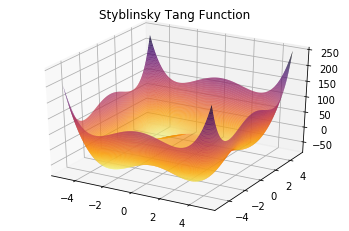

In [105]:
#Let's plot our function when x is two-dimensional
x = np.linspace(-5, 5, 250)
y = np.linspace(-5, 5, 250)
x, y = np.meshgrid(x, y)
z = sty_tang(np.array([x,y]))

ax = plt.axes(projection='3d')
ax.set_title('Styblinsky Tang Function')
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='inferno_r', edgecolor='none')

It looks that our function has four local minimums (one being the global). So, it is natural that the algorithms does not reach the global minimum under certain initial values. Now, let's evaluate some initial values and see the bahavior of the algorithms 